# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read file

### Loading data

In [2]:
df = pd.read_csv('.\data\credit.csv')
data = df.copy()

### Data overview

In [3]:
data.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

- There are total 1000 entries and 16 features and 1 response ("default")
- There is no feature have missing values.
- all of feature are correct data type except "default" column, we might change it to binary data later. 


In [5]:
## checking null values
round(data.isna().sum()/data.isnull().count()*100, 2)

checking_balance        0.0
months_loan_duration    0.0
credit_history          0.0
purpose                 0.0
amount                  0.0
savings_balance         0.0
employment_duration     0.0
percent_of_income       0.0
years_at_residence      0.0
age                     0.0
other_credit            0.0
housing                 0.0
existing_loans_count    0.0
job                     0.0
dependents              0.0
phone                   0.0
default                 0.0
dtype: float64

In [6]:
data.duplicated().sum()

0

- No missing data in any features.
- no duplicate row in dataset

### Statiscal summary

In [12]:
data.describe().T.to_csv(r'.\data\num_stat_data.csv')
data.describe(include=['O']).T.to_csv(r'.\data\cat_stat_data.csv')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


# Categorical and numerical columns exploration

In [8]:
categorical_cols = data.select_dtypes('object').columns
numeric_cols = [col for col in data.columns if col not in categorical_cols]

### Categorical columns checking

In [9]:
for col in categorical_cols:
    print(data[col].value_counts())
    print("-"*50, "\n")

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64
-------------------------------------------------- 

credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64
-------------------------------------------------- 

purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64
-------------------------------------------------- 

savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64
-------------------------------------------------- 

employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64
-------------------------------------------------- 

othe

We can replace car0 categories in purpose later in preprocessing file

### Numerical data checking

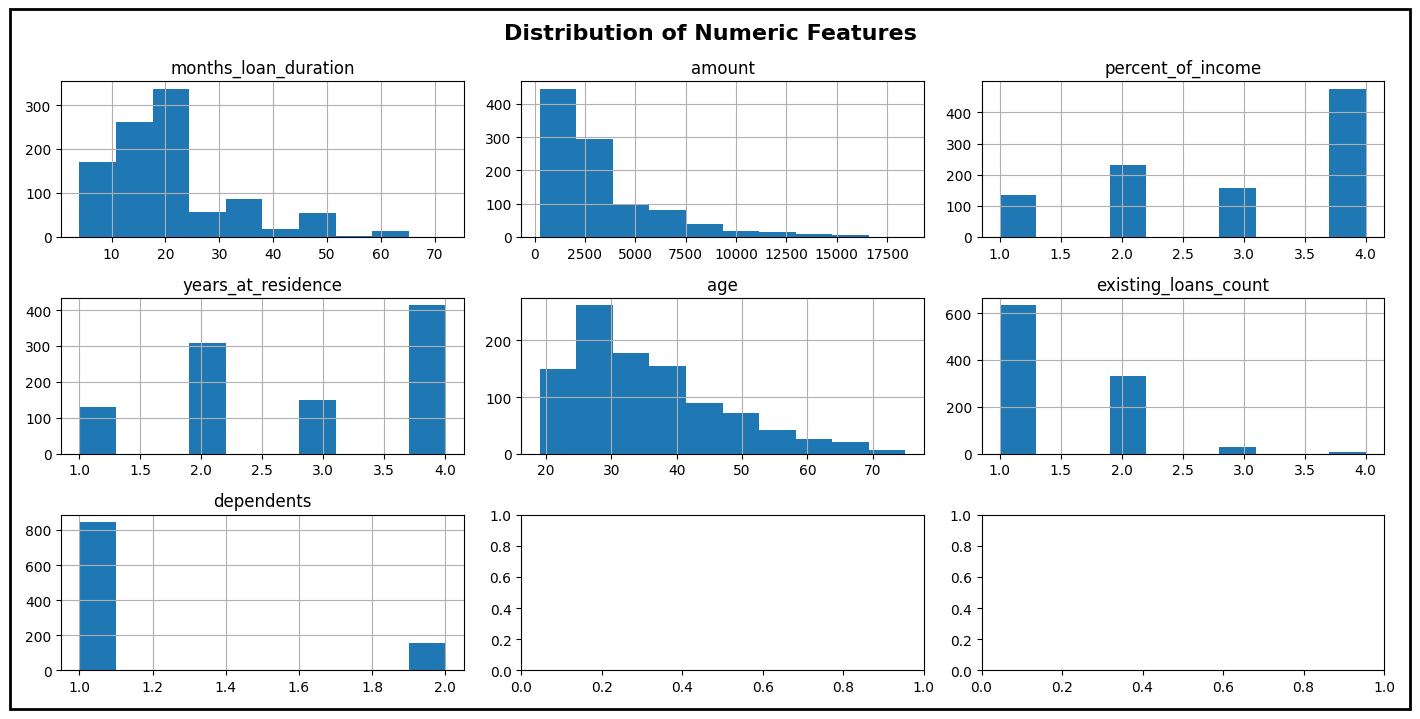

In [10]:
# Calculate the number of rows and columns for the subplot grid
num_plots = len(numeric_cols)
num_cols = 3  
num_rows = (num_plots + num_cols - 1) // num_cols  
# Create a figure with a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 7))
# Flatten the array of axes and remove any excess axes if the number of plots is not a perfect multiple
axs = axs.flatten()[:num_plots]
# Plot histograms for numeric columns
for ax, col in zip(axs, numeric_cols):
    data[col].hist(ax=ax)
    ax.set_title(col)
for ax in axs[num_plots:]:
    ax.remove()

fig.suptitle('Distribution of Numeric Features', fontsize=16, fontweight = "bold")
# Add a rectangle around the entire figure
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.00, 0.0), 1, 1, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
# Add the rectangle to the figure
fig.patches.extend([rect])
# Apply tight layout to adjust for the histograms
plt.tight_layout()
# Show the plot
plt.show()
fig.savefig(r'.\data\num_distribution.png', bbox_inches="tight")

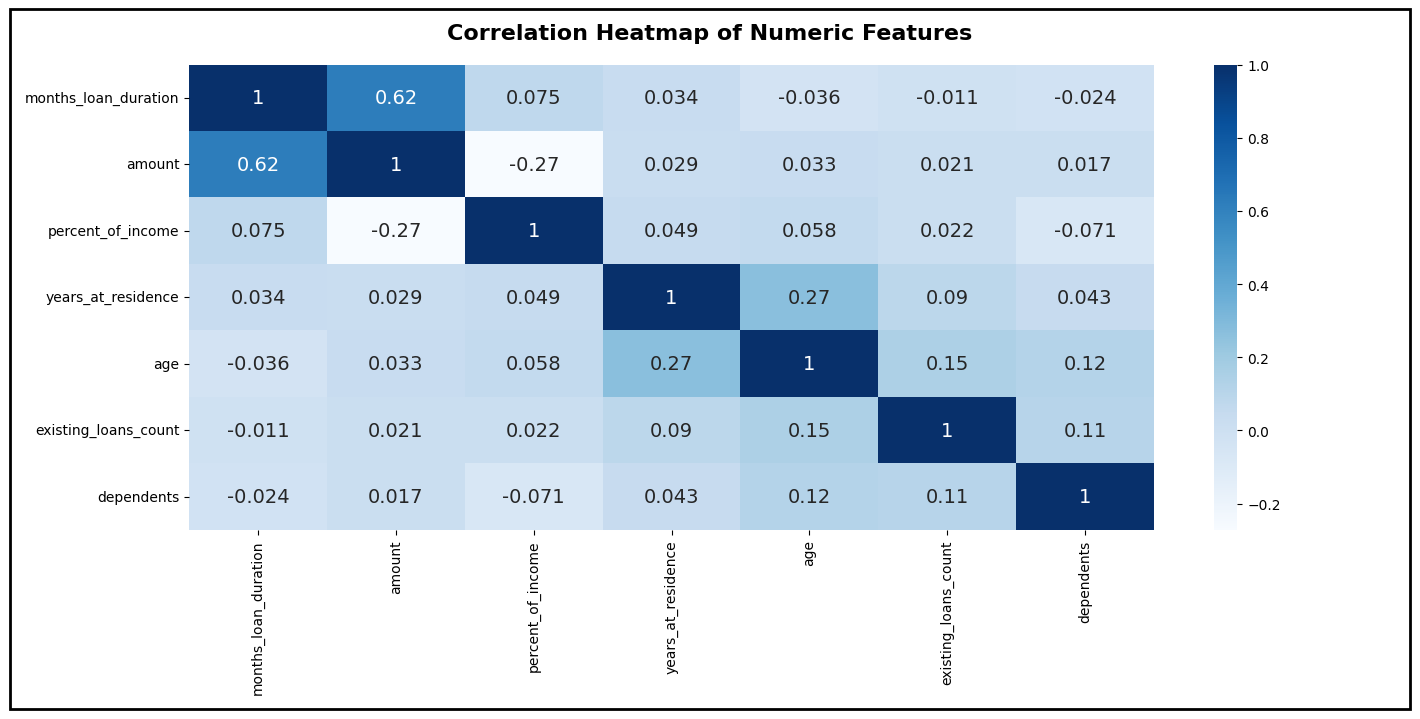

In [11]:
## create heatmap to check features correlation
fig = plt.figure(figsize=(14,7))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap= "Blues", annot_kws={"size": 14})
fig.suptitle('Correlation Heatmap of Numeric Features', fontsize=16, fontweight = "bold")
# Add a rectangle around the entire figure
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.00, 0.0), 1, 1, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)

# Add the rectangle to the figure
fig.patches.extend([rect])
plt.tight_layout()
plt.show()
fig.savefig(r'.\data\num_feature_correlation.png', bbox_inches="tight")

In [14]:
data1 = data.copy()
le = LabelEncoder()
X = data1.drop(columns="default", axis = 1)
Y= le.fit_transform(data1["default"])

In [15]:
# Splitting data into training, validation and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(700, 16) (300, 16)


In [17]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('tf1', OrdinalEncoder(),
                                 ['checking_balance', 'credit_history',
                                  'savings_balance', 'employment_duration']),
                                ('tf2',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['purpose', 'other_credit', 'housing', 'job',
                                  'phone'])])

In [18]:
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
print(X_train.shape, X_test.shape)

(700, 23) (300, 23)


In [19]:
imputer = SimpleImputer(strategy= 'median')
impute = imputer.fit(X_train)
X_train = impute.transform(X_train)
X_test = imputer.transform(X_test)

In [20]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [21]:
def model_base_result(tree_models, X_train, y_train, X_test, y_test):
    train_score = []
    names = []
    test_score = []
    best_estimators = {}
    for name, model, params in tree_models:
        print(f"Training and tuning {name}...")
        clf = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        clf.fit(X_train, y_train)
        # Evaluate on the validation set
        val_score = clf.score(X_test, y_test)
        train_score.append(clf.best_score_)
        test_score.append(val_score)
        names.append(name)
        best_estimators[name] = clf.best_estimator_
    ## voting
    print("Validation accuracy for Voting Classifier...")
    # Create a list of tuples with the best estimators for the Voting Classifier
    voting_estimators = [(name, estimator) for name, estimator in best_estimators.items()]
    # Create a Voting Classifier with soft voting
    voting_clf = VotingClassifier(estimators=voting_estimators, voting='soft')
    voting_clf.fit(X_train, y_train)
    
    # Evaluate the Voting Classifier on the validation set
    voting_val_score = voting_clf.score(X_test, y_test)
    print("Combining result....")
    ## append all result 
    train_score.append(voting_clf.score(X_train, y_train))
    test_score.append(voting_val_score)
    names.append("Voting")
    result = pd.DataFrame([train_score, test_score], columns=names, index=["train", "test"])
    return result

In [22]:
tree_models = []
# Append tree base model
tree_models.append(('Bagging', BaggingClassifier(), 
                    {'n_estimators': [10, 50, 100]}))
tree_models.append(('RandomForest', RandomForestClassifier(), 
                    {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}))
tree_models.append(('GradientBoosting', GradientBoostingClassifier(),
                    {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}))
tree_models.append(('AdaBoost', AdaBoostClassifier(), 
                    {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}))
tree_models.append(('XGB', XGBClassifier(), 
                    {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}))
tree_models.append(('LGBM', LGBMClassifier(force_row_wise=True, min_data_in_leaf=40, max_depth=-1, min_gain_to_split=0.001), {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, -1],
    'min_data_in_leaf': [20, 30, 40],
}))

tree_models.append(('CatBoost', CatBoostClassifier(verbose=0), 
                    {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'depth': [3, 5]}))
tree_result = model_base_result(tree_models, X_train,  y_train,X_test, y_test)

Training and tuning Bagging...
Training and tuning RandomForest...
Training and tuning GradientBoosting...
Training and tuning AdaBoost...
Training and tuning XGB...
Training and tuning LGBM...
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Info] Number of positive: 210, number of negative: 490
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training fr

In [23]:
tree_result

,Bagging,RandomForest,GradientBoosting,AdaBoost,XGB,LGBM,CatBoost,Voting
train,0.762857,0.754286,0.758571,0.738571,0.764286,0.765714,0.760000,0.968571
test,0.753333,0.746667,0.716667,0.736667,0.753333,0.723333,0.743333,0.740000


In [24]:
non_tree_models = []
non_tree_models.append(('LogisticRegression', LogisticRegression(), {'C': [0.1, 1, 10]}))
non_tree_models.append(('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}))
non_tree_models.append(('LDA', LinearDiscriminantAnalysis(), {'solver': ['svd', 'lsqr', 'eigen']}))
non_tree_models.append(('QDA', QuadraticDiscriminantAnalysis(), {}))
non_tree_models.append(('SVM', SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}))  


In [25]:
non_tree_result = model_base_result(non_tree_models, X_train_scaled, y_train, X_test_scaled, y_test)

Training and tuning LogisticRegression...
Training and tuning KNN...
Training and tuning LDA...
Training and tuning QDA...
Training and tuning SVM...
Validation accuracy for Voting Classifier...
Combining result....


In [26]:
non_tree_result_x = non_tree_result.T
non_tree_result_x['model_type'] = "non_tree_base_model"
non_tree_result_x['model'] = non_tree_result_x.index

In [27]:
tree_result_x = tree_result.T
tree_result_x['model_type'] = "tree_base_model"
tree_result_x['model'] = tree_result_x.index

In [28]:
result = pd.concat([non_tree_result_x.reset_index(drop=True),tree_result_x.reset_index(drop= True)], axis=0 )

In [29]:
sort_col = ['model_type', 'model', 'train', 'test']
result[sort_col]

,model_type,model,train,test
0,non_tree_base_model,LogisticRegression,0.721429,0.713333
1,non_tree_base_model,KNN,0.697143,0.696667
2,non_tree_base_model,LDA,0.717143,0.710000
3,non_tree_base_model,QDA,0.687143,0.696667
4,non_tree_base_model,SVM,0.724286,0.740000
5,non_tree_base_model,Voting,0.788571,0.723333
0,tree_base_model,Bagging,0.762857,0.753333
1,tree_base_model,RandomForest,0.754286,0.746667
2,tree_base_model,GradientBoosting,0.758571,0.716667
3,tree_base_model,AdaBoost,0.738571,0.736667


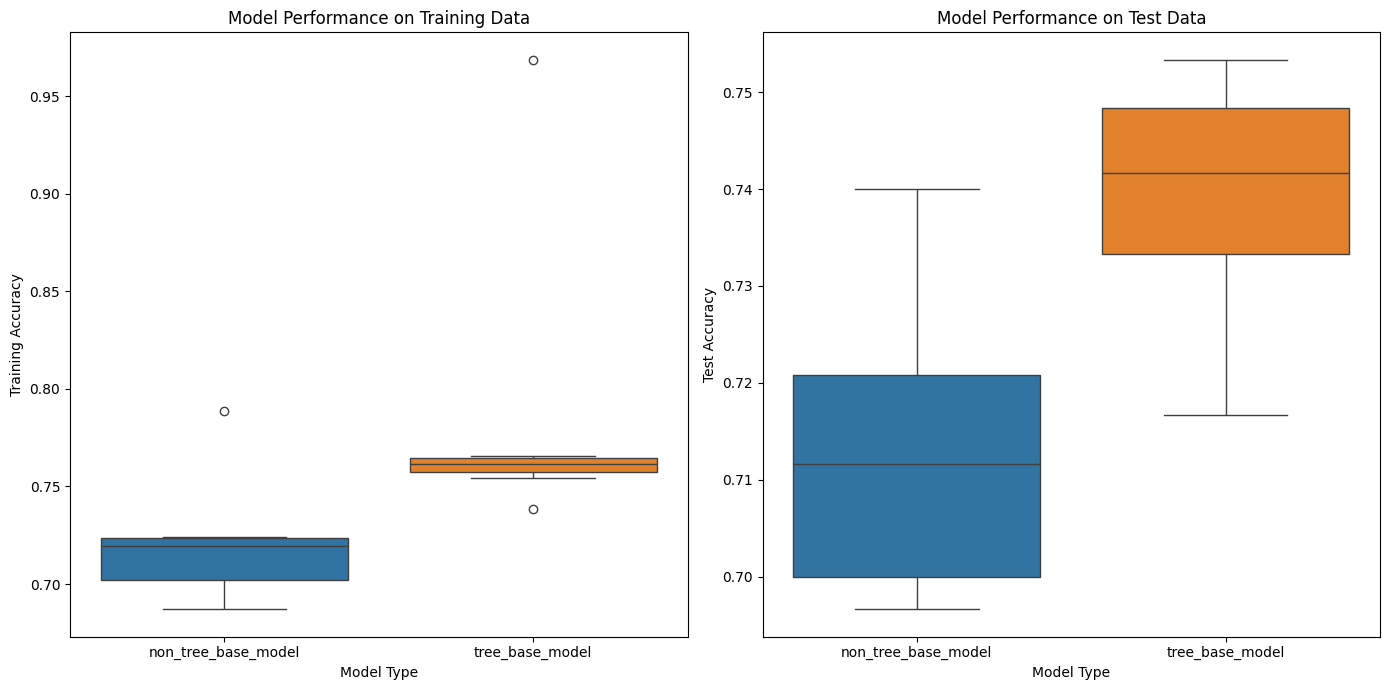

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'result' is a pandas DataFrame with the appropriate data

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot for training data
sns.boxplot(data=result, x='model_type', y='train', hue='model_type', ax=ax[0])
ax[0].set_title('Model Performance on Training Data')  # Set title for the left subplot
ax[0].set_xlabel('Model Type')  # Set x-axis label
ax[0].set_ylabel('Training Accuracy')  # Set y-axis label
ax[0].legend(title='Model Type')  # Set legend title
ax[0].get_legend().remove()  # Optional: remove the legend if it's redundant

# Plot for test data
sns.boxplot(data=result, x='model_type', y='test', hue='model_type', ax=ax[1])
ax[1].set_title('Model Performance on Test Data')  # Set title for the right subplot
ax[1].set_xlabel('Model Type')  # Set x-axis label
ax[1].set_ylabel('Test Accuracy')  # Set y-axis label
ax[1].legend(title='Model Type')  # Set legend title
ax[1].get_legend().remove()  # Optional: remove the legend if it's redundant

plt.tight_layout()
plt.show()


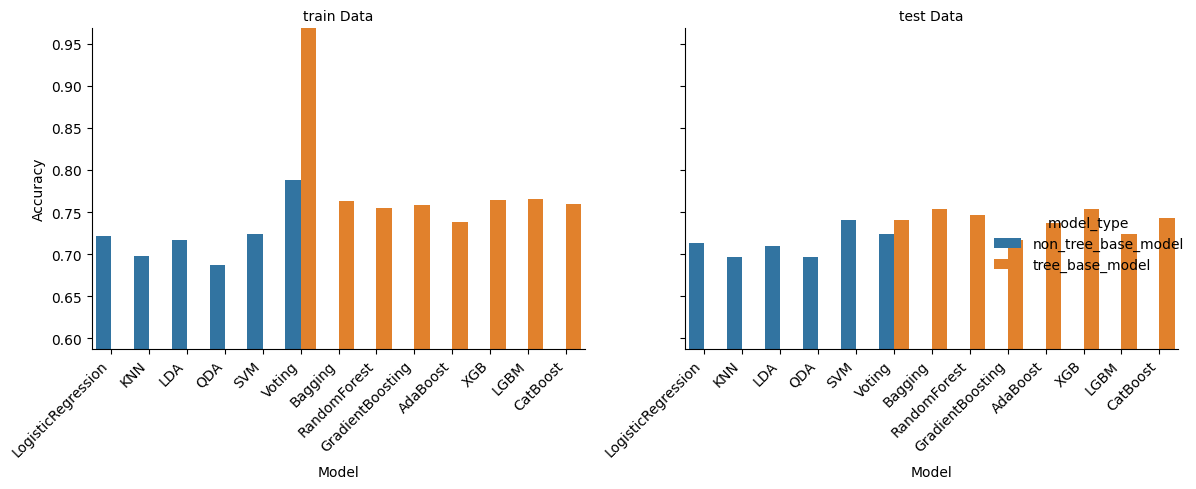

In [31]:
# Calculate the global minimum and maximum across both 'train' and 'test' columns
global_min = result[['train', 'test']].min().min()
global_max = result[['train', 'test']].max().max()

# Melt the DataFrame to have "train" and "test" in the same column
result_melted = result.melt(id_vars=['model_type', 'model'], value_vars=['train', 'test'], var_name='data_type', value_name='score')

# Create a bar plot using Seaborn's catplot with facets for "train" and "test"
g = sns.catplot(
    data=result_melted,
    x='model',
    y='score',
    hue='model_type',
    col='data_type',
    kind='bar',
    height=5,
    aspect=1,
    palette='tab10'
)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')

# Set the labels and titles for each facet
g.set_axis_labels('Model', 'Accuracy')
g.set_titles('{col_name} Data')

# Adjust the y-axis limits to the min and max values
g.set(ylim=(global_min-0.1, global_max))
# Show the plot
plt.tight_layout()
plt.show()
